## Objective - Create entanglement between two qubits

In [13]:
# Import libraries
from qiskit import QuantumCircuit, assemble, Aer, execute, IBMQ, __qiskit_version__
from qiskit.providers.ibmq import least_busy
from qiskit.tools import job_monitor
from qiskit_textbook.tools import array_to_latex
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

#### Create circuit

In [14]:
qc = QuantumCircuit(2)    # Quantum circuit with 2 qubits and 2 bits
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

qobj = assemble(qc)

qc.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

#### simulate circuit

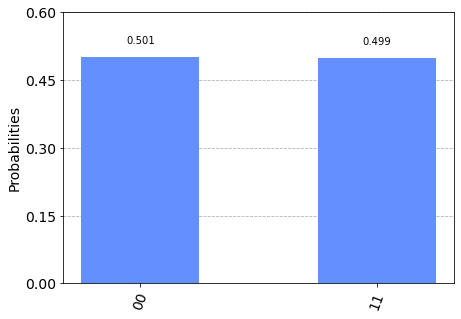

In [15]:
simulator = Aer.get_backend('qasm_simulator')

job = execute(qc, simulator, shots=1000)

results = job.result()
counts = results.get_counts()

plot_histogram(counts)


#### Check on bloch sphere

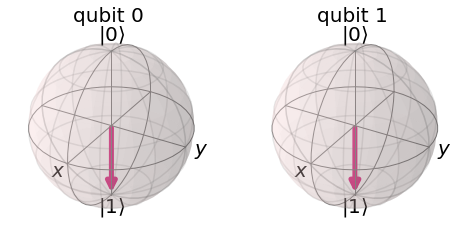

In [19]:
simulator = Aer.get_backend('statevector_simulator')

job = simulator.run(qobj)
statevector = job.result().get_statevector()

plot_bloch_multivector(statevector)
